# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Jarrod Sims

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [21]:
import requests
import pickle
import spacy
from bs4 import BeautifulSoup
parser = 'html.parser'

article_page = requests.get('https://www.thedailybeast.com/judge-aileen-cannon-comes-out-swinging-in-trumps-favor-again-in-classified-docs-case?ref=home')
html_content = article_page.text
soup = BeautifulSoup(html_content, "html.parser")
article = soup.find("article")

with open ("FarLeft_DailyBeast.pkl", "wb") as file:
    pickle.dump(str(article),file)
    print('Article printed to pickle')

article_page = requests.get('https://www.breitbart.com/politics/2023/08/09/january-6-committee-destroyed-records-videos-trump-rights-violated/')
html_content = article_page.text
soup = BeautifulSoup(html_content, "html.parser")
article = soup.find("article")

with open ("FarRight_Breitbart.pkl", "wb") as file:
    pickle.dump(str(article),file)
    print('Article printed to pickle')


article_page = requests.get('https://apnews.com/article/abortion-rights-ohio-election-constitution-special-interests-06217130060cd97d398169052b6d511a')
html_content = article_page.text
soup = BeautifulSoup(html_content, "html.parser")
article = soup.find("article")

with open ("Moderate_AP.pkl", "wb") as file:
    pickle.dump(str(article),file)
    print('Article printed to pickle')

Article printed to pickle
Article printed to pickle
Article printed to pickle


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [38]:
#### Far Left Polarity Score ####
with open("FarLeft_DailyBeast.pkl", "rb") as file:
    html_text = pickle.load(file)

soup = BeautifulSoup(html_text, "html.parser")
text = soup.get_text()


def remove_empty_lines(text):
    lines = text.split("\n")
    non_empty_lines = [line.strip() for line in lines if line.strip()]
    return "\n".join(non_empty_lines)

cleaned_text_left = remove_empty_lines(text)

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')
doc = nlp(cleaned_text_left)
polarity = doc._.polarity
print("Far left article polarity score:", polarity)

#### Far Right Polarity Score ####
with open("FarRight_Breitbart.pkl", "rb") as file:
    html_text = pickle.load(file)

soup = BeautifulSoup(html_text, "html.parser")
text = soup.get_text()


def remove_empty_lines(text):
    lines = text.split("\n")
    non_empty_lines = [line.strip() for line in lines if line.strip()]
    return "\n".join(non_empty_lines)

cleaned_text_right = remove_empty_lines(text)

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')
doc = nlp(cleaned_text_right)
polarity = doc._.polarity
print("Far right article polarity score:", polarity)

#### Moderate Polarity Score ####
with open("Moderate_AP.pkl", "rb") as file:
    html_text = pickle.load(file)

soup = BeautifulSoup(html_text, "html.parser")
text = soup.get_text()


def remove_empty_lines(text):
    lines = text.split("\n")
    non_empty_lines = [line.strip() for line in lines if line.strip()]
    return "\n".join(non_empty_lines)

cleaned_text_mod = remove_empty_lines(text)

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')
doc = nlp(cleaned_text_mod)
polarity = doc._.polarity
print("Moderate article Polarity score:", polarity)


Far left article polarity score: 0.08225665748393021
Far right article polarity score: 0.03247542283686862
Moderate article Polarity score: 0.06926458462172745


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [49]:
import spacy 

#### Far Left Tokens ####
nlp = spacy.load('en_core_web_sm')
doc_left = nlp(cleaned_text_left)

non_ws_tokens = []
for token in doc_left:
    if not token.is_space:
        non_ws_tokens.append(token)
#print(non_ws_tokens)

def we_care_about(token):
    return not (token.is_space or token.is_punct)

from collections import Counter
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token for token in doc_left if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))
print(f"The most common words in the far left article are: {word_freq.most_common(5)}")


#### Far Right Tokens ####
nlp = spacy.load('en_core_web_sm')
doc_right = nlp(cleaned_text_right)

non_ws_tokens = []
for token in doc_right:
    if not token.is_space:
        non_ws_tokens.append(token)
#print(non_ws_tokens)

def we_care_about(token):
    return not (token.is_space or token.is_punct)

from collections import Counter
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token for token in doc_right if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))
print(f"The most common words in the far right article are: {word_freq.most_common(5)}")

#### Moderate Tokens ####
nlp = spacy.load('en_core_web_sm')
doc_mod = nlp(cleaned_text_mod)

non_ws_tokens = []
for token in doc_mod:
    if not token.is_space:
        non_ws_tokens.append(token)
#print(non_ws_tokens)

def we_care_about(token):
    return not (token.is_space or token.is_punct)

from collections import Counter
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token for token in doc_mod if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))
print(f"The most common words in the moderate article are: {word_freq.most_common(5)}")

The most common words in the far left article are: [('Cannon', 16), ('Trump', 10), ('jury', 9), ('case', 6), ('grand', 5)]
The most common words in the far right article are: [('committee', 23), ('House', 12), ('Capitol', 8), ('Thompson', 8), ('evidence', 7)]
The most common words in the moderate article are: [('Ohio', 51), ('abortion', 41), ('AP', 38), ('1', 34), ('Issue', 34)]


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [51]:
#### Far Left Lemmas ####
interesting_lemmas = [token.lemma_ for token in doc_left if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)

def print_word_frequencies(common_words):
    print("Five Most Common Words in the Far Left Article:")
    print("-----------------")
    for word, frequency in common_words:
        print(f"{word}: {frequency}")

common_words = lemma_freq.most_common(5)

print_word_frequencies(common_words)

#### Far Right Lemmas ####
interesting_lemmas = [token.lemma_ for token in doc_right if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)

def print_word_frequencies(common_words):
    print("Five Most Common Words in the Far Right Article:")
    print("-----------------")
    for word, frequency in common_words:
        print(f"{word}: {frequency}")

common_words = lemma_freq.most_common(5)

print_word_frequencies(common_words)

#### Far Left Lemmas ####
interesting_lemmas = [token.lemma_ for token in doc_mod if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)

def print_word_frequencies(common_words):
    print("Five Most Common Words in the Moderate Article:")
    print("-----------------")
    for word, frequency in common_words:
        print(f"{word}: {frequency}")

common_words = lemma_freq.most_common(5)

print_word_frequencies(common_words)

Five Most Common Words in the Far Left Article:
-----------------
Cannon: 15
Trump: 9
jury: 9
case: 6
prosecutor: 6
Five Most Common Words in the Far Right Article:
-----------------
committee: 23
House: 12
preserve: 8
Capitol: 8
Thompson: 8
Five Most Common Words in the Moderate Article:
-----------------
Ohio: 51
abortion: 43
AP: 38
1: 34
Issue: 31


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

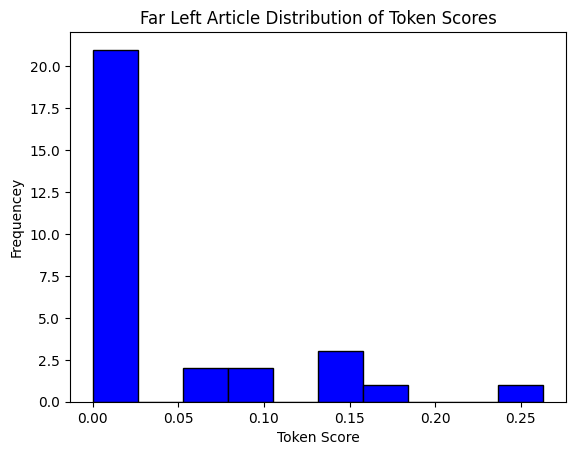

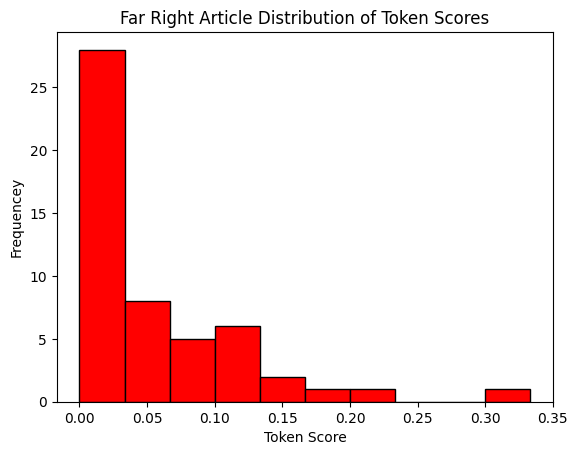

'\n#### Note I could not get the moderate distribution to work. I was getting a divide by zero error. I think I know why but am out of time to fix at this moment. ####\n\n################################\n#### Moderate Distribution ####\n################################\n\nsentences_mod = extract_sentences(cleaned_text_mod)\n\nscores_by_tokens = []\ninteresting_tokens = [\'Ohio\',\'abortion\',\'AP\',\'Issue\']\n       \nfor sentence in sentences_mod:\n    score = score_sentence_by_token(sentence, interesting_tokens)\n    scores_by_tokens.append(score)\n\nplt.hist(scores_by_tokens, color=\'purple\', bins=10, edgecolor=\'black\')\nplt.xlabel("Token Score")\nplt.ylabel("Frequencey")\nplt.title("Moderate Article Distribution of Token Scores")\nplt.show()\n\n'

In [78]:
import spacy
import pickle
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt

def remove_stopwords_and_punctuations(tokens):
    return [token.lemma_.lower() for token in tokens if not token.is_stop and token.is_alpha]

def score_sentence_by_token(sentence, interesting_tokens):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)
    clean_tokens = remove_stopwords_and_punctuations(doc)
    interesting_token_count = sum(1 for token in clean_tokens if token in interesting_tokens)
    score = interesting_token_count / len(clean_tokens)
    return score

def extract_sentences(cleaned_text_left):
    nlp = spacy.load('en_core_web_sm')
    doc_left = nlp(cleaned_text_left)
    sentences_left = [sent.text for sent in doc_left.sents]

    return sentences_left

###############################
#### Far Left Distribution ####
###############################

sentences_left = extract_sentences(cleaned_text_left)

scores_by_tokens = []
interesting_tokens = ['canon','Trump','jury','case','grand']
       
for sentence in sentences_left:
    score = score_sentence_by_token(sentence, interesting_tokens)
    scores_by_tokens.append(score)

plt.hist(scores_by_tokens, color= 'blue', bins=10, edgecolor='black')
plt.xlabel("Token Score")
plt.ylabel("Frequencey")
plt.title("Far Left Article Distribution of Token Scores")
plt.show()

################################
#### Far Right Distribution ####
################################

sentences_right = extract_sentences(cleaned_text_right)

scores_by_tokens = []
interesting_tokens = ['committee','House','preserve','Capitol','Thompson']
       
for sentence in sentences_right:
    score = score_sentence_by_token(sentence, interesting_tokens)
    scores_by_tokens.append(score)

plt.hist(scores_by_tokens, color='red', bins=10, edgecolor='black')
plt.xlabel("Token Score")
plt.ylabel("Frequencey")
plt.title("Far Right Article Distribution of Token Scores")
plt.show()

"""
#### Note I could not get the moderate distribution to work. I was getting a divide by zero error. I think I know why but am out of time to fix at this moment. ####

################################
#### Moderate Distribution ####
################################

sentences_mod = extract_sentences(cleaned_text_mod)

scores_by_tokens = []
interesting_tokens = ['Ohio','abortion','AP','Issue']
       
for sentence in sentences_mod:
    score = score_sentence_by_token(sentence, interesting_tokens)
    scores_by_tokens.append(score)

plt.hist(scores_by_tokens, color='purple', bins=10, edgecolor='black')
plt.xlabel("Token Score")
plt.ylabel("Frequencey")
plt.title("Moderate Article Distribution of Token Scores")
plt.show()

"""


6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?